## Mapping and plotting tools

GeoPandas provides a high-level interface to the [matplotlib](https://matplotlib.org/stable/) library for making maps. Mapping shapes is as easy as using the [`plot()`](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot) method on a [`GeoSeries`](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.html#geopandas.GeoSeries) or [`GeoDataFrame`](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.html#geopandas.GeoDataFrame).

Loading some example data:

In [1]:
import geodatasets
import geopandas
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
geodatasets.get_path("geoda.chicago_commpop")

'/home/yousef/.cache/geodatasets/chicago_commpop.zip.unzip/chicago_commpop/chicago_commpop.geojson'

In [8]:
# Examine the chicago GeoDataFrame
chicago = geopandas.read_file(geodatasets.get_path("geoda.chicago_commpop"))
chicago.head()

,community,NID,POP2010,POP2000,POPCH,POPPERCH,popplus,popneg,geometry
0,DOUGLAS,35,18238,26470,-8232,-31.099358,0,1,"MULTIPOLYGON (((-87.60914 41.84469, -87.60915 ..."
1,OAKLAND,36,5918,6110,-192,-3.142390,0,1,"MULTIPOLYGON (((-87.59215 41.81693, -87.59231 ..."
2,FULLER PARK,37,2876,3420,-544,-15.906433,0,1,"MULTIPOLYGON (((-87.62880 41.80189, -87.62879 ..."
3,GRAND BOULEVARD,38,21929,28006,-6077,-21.698922,0,1,"MULTIPOLYGON (((-87.60671 41.81681, -87.60670 ..."
4,KENWOOD,39,17841,18363,-522,-2.842673,0,1,"MULTIPOLYGON (((-87.59215 41.81693, -87.59215 ..."


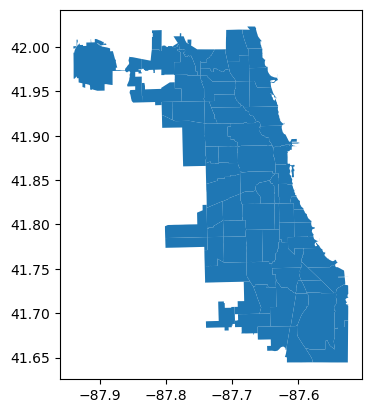

In [10]:
# Basic plot, single color
chicago.plot();

In [11]:
geodatasets.get_path("geoda.groceries")

'/home/yousef/.cache/geodatasets/grocery.zip.unzip/grocery/chicago_sup.shp'

In [12]:
groceries = geopandas.read_file(geodatasets.get_path("geoda.groceries"))
groceries.head()

,OBJECTID,Ycoord,Xcoord,Status,Address,Chain,Category,geometry
0,16,41.973266,-87.657073,OPEN,"1051 W ARGYLE ST, CHICAGO, IL. 60640",VIET HOA PLAZA,None,MULTIPOINT ((1168268.672 1933554.350))
1,18,41.696367,-87.681315,OPEN,"10800 S WESTERN AVE, CHICAGO, IL. 60643-3226",COUNTY FAIR FOODS,None,MULTIPOINT ((1162302.618 1832900.224))
2,22,41.868634,-87.638638,OPEN,"1101 S CANAL ST, CHICAGO, IL. 60607-4932",WHOLE FOODS MARKET,None,MULTIPOINT ((1173317.042 1895425.426))
3,23,41.877590,-87.654953,OPEN,"1101 W JACKSON BLVD, CHICAGO, IL. 60607-2905",TARGET/SUPER,new,MULTIPOINT ((1168996.475 1898801.406))
4,27,41.737696,-87.625795,OPEN,"112 W 87TH ST, CHICAGO, IL. 60620-1318",FOOD 4 LESS,None,MULTIPOINT ((1176991.989 1847262.423))


<Axes: >

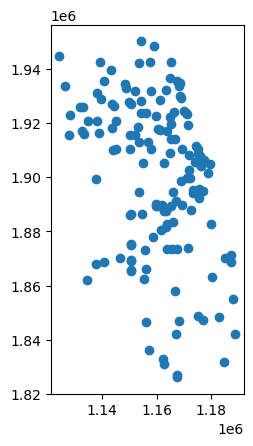

In [13]:
groceries.plot()

Note that in general, any options one can pass to [pyplot](http://matplotlib.org/api/pyplot_api.html) in [matplotlib](https://matplotlib.org/stable/) (or [style options that work for lines](http://matplotlib.org/api/lines_api.html)) can be passed to the [`plot()`](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot) method.

### Choropleth maps

GeoPandas makes it easy to create Choropleth maps (maps where the color of each shape is based on the value of an associated variable). Simply use the plot command with the *`column`* argument set to the column whose values you want used to assign colors.

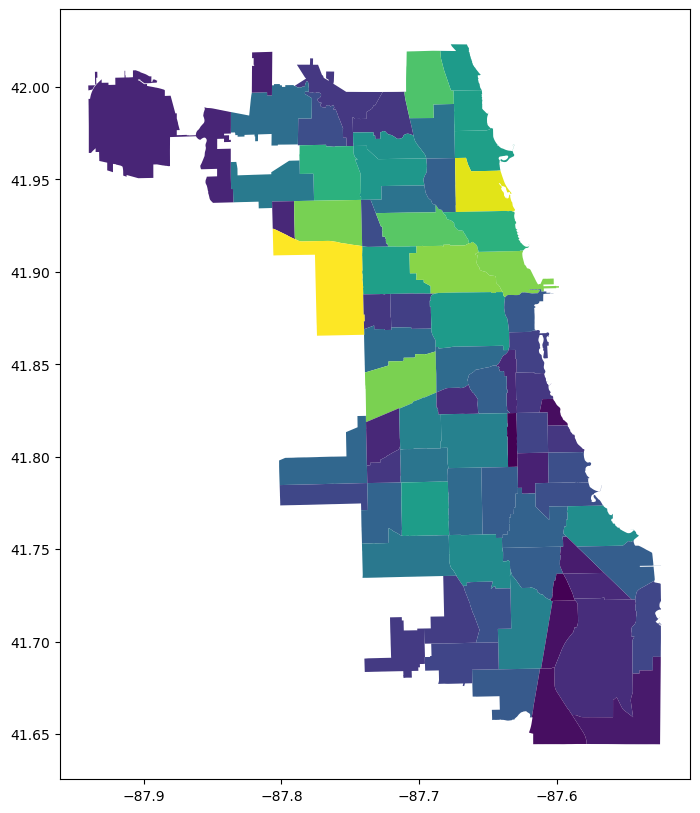

In [20]:
# plot by population
chicago.plot(column="POP2010", figsize=(10, 10));

### Creating a legend
When plotting a map, one can enable a legend using the *`legend`* argument:

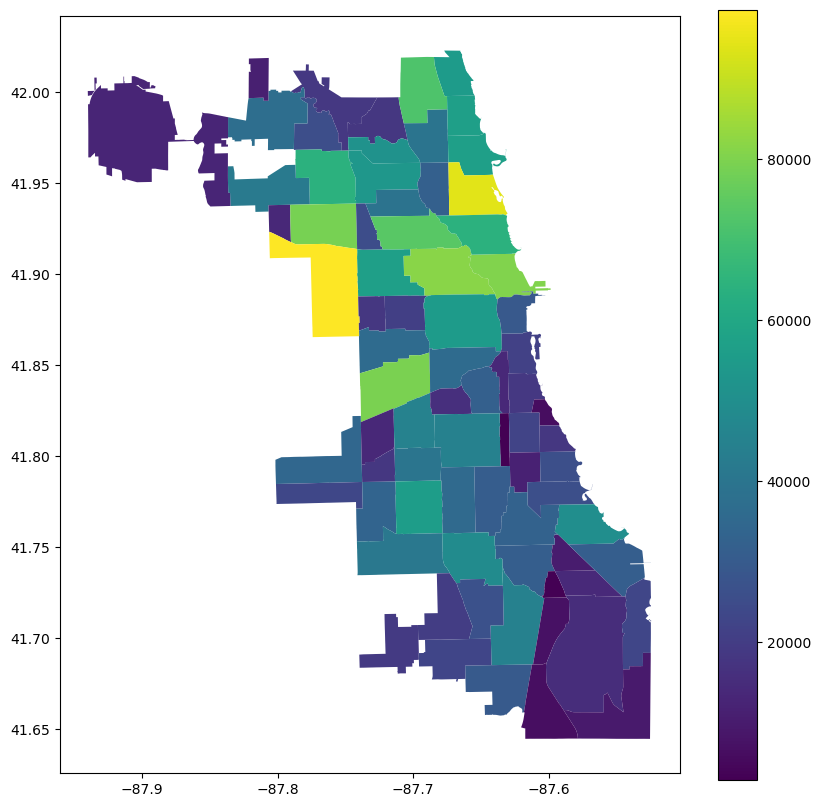

In [21]:
# Plot population estimates with an accurate legend
chicago.plot(column='POP2010', legend=True, figsize=(10, 10));

The following example plots the color bar below the map and adds its label using *`legend_kwds`*:

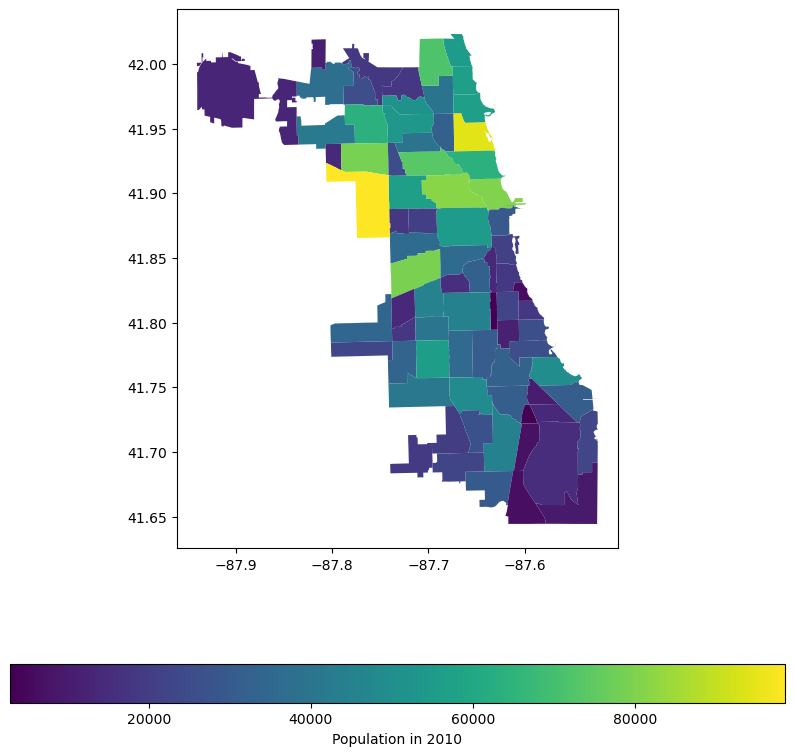

In [22]:
# Plot population estimates with an accurate legend
chicago.plot(
    column="POP2010",
    legend=True,
    legend_kwds={"label": "Population in 2010", "orientation": "horizontal"},
    figsize=(10, 10)
);

However, the default appearance of the legend and plot axes may not be desirable. One can define the plot axes (with *`ax`*) and the legend axes (with *`cax`*) and then pass those in to the [`plot()`](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot) call. The following example uses *`mpl_toolkits`* to horizontally align the plot axes and the legend axes and change the width:

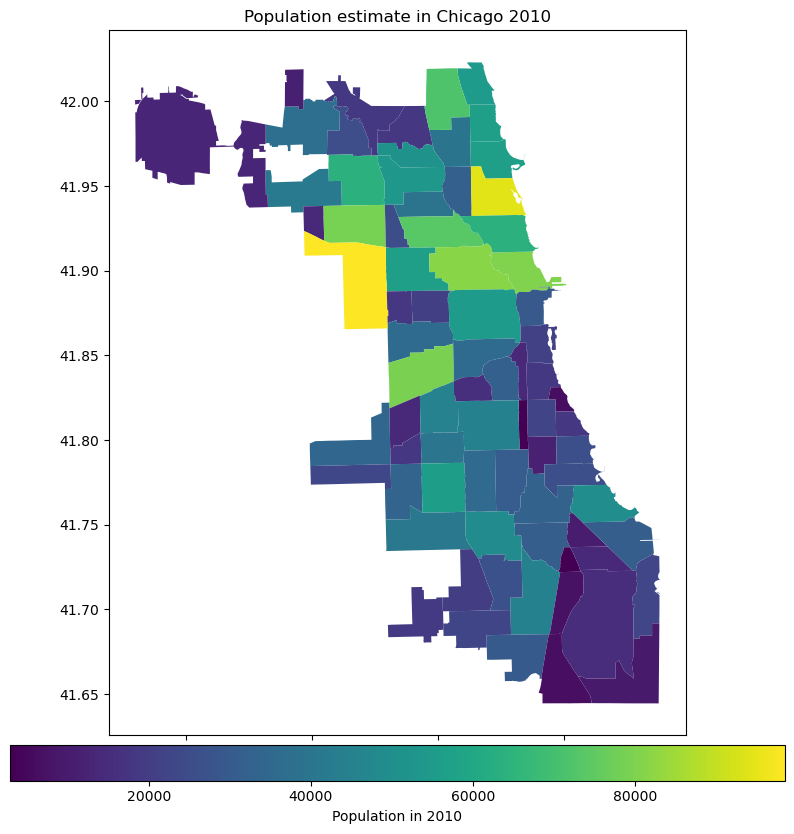

In [30]:
# Plot population estimates with an accurate legend
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="5%", pad=0.1)
chicago.plot(
    column="POP2010",
    ax=ax,
    legend=True,
    cax=cax,
    legend_kwds={"label": "Population in 2010", "orientation": "horizontal"},
)
ax.set_title("Population estimate in Chicago 2010")
fig.savefig("./out/Population_estimate_in_Chicago_2010.png", dpi=300);

### Choosing colors
You can also modify the colors used by [`plot()`](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot) with the *`cmap`* option. For a full list of colormaps, see [Choosing Colormaps in Matplotlib](https://matplotlib.org/stable/tutorials/colors/colormaps.html).

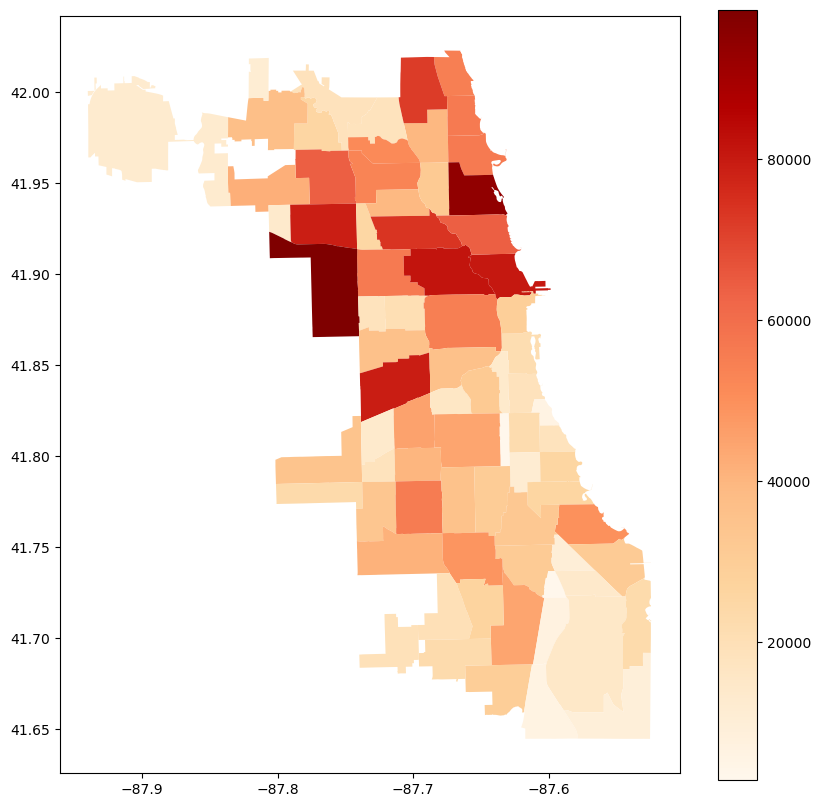

In [32]:
chicago.plot(column='POP2010', cmap='OrRd', figsize=(10, 10), legend=True);

To make the color transparent for when you just want to show the boundary, you have two options. One option is to do *`chicago.plot(facecolor="none", edgecolor="black")`*. However, this can cause a lot of confusion because *`"none"`* and *`None`* are different in the context of using *`facecolor`* and they do opposite things. *`None`* does the “default behavior” based on matplotlib, and if you use it for *`facecolor`*, it actually adds a color. The second option is to use *`chicago.boundary.plot()`*. This option is more explicit and clear.:

<Axes: >

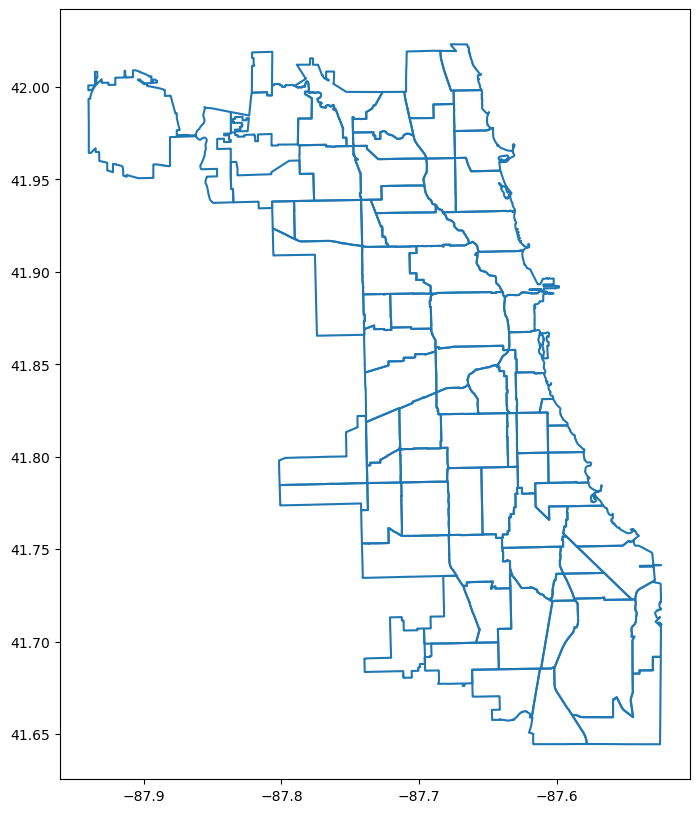

In [34]:
chicago.boundary.plot(figsize=(10, 10))

The way color maps are scaled can also be manipulated with the *`scheme`* option (if you have *`mapclassify`* installed, which can be accomplished via *`conda install -c conda-forge mapclassify`*). The scheme option can be set to any scheme provided by mapclassify (e.g. ‘box_plot’, ‘equal_interval’, ‘fisher_jenks’, ‘fisher_jenks_sampled’, ‘headtail_breaks’, ‘jenks_caspall’, ‘jenks_caspall_forced’, ‘jenks_caspall_sampled’, ‘max_p_classifier’, ‘maximum_breaks’, ‘natural_breaks’, ‘quantiles’, ‘percentiles’, ‘std_mean’ or ‘user_defined’). Arguments can be passed in classification_kwds dict. See the [mapclassify documentation](https://pysal.org/mapclassify) for further details about these map classification schemes.

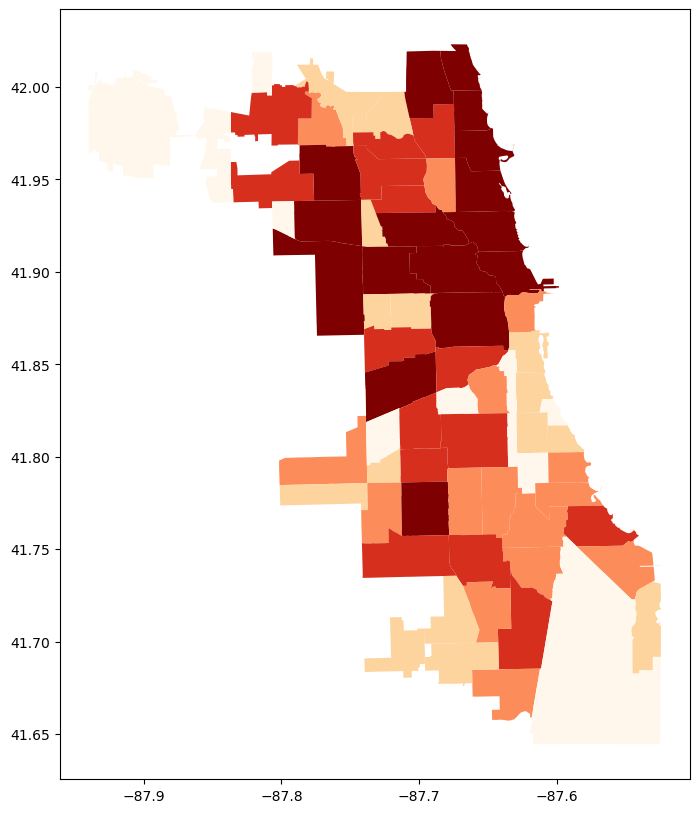

In [35]:
chicago.plot(column='POP2010', cmap='OrRd', scheme='quantiles', figsize=(10, 10));

### Missing data
In some cases one may want to plot data which contains missing values - for some features one simply does not know the value. Geopandas (from the version 0.7) by defaults ignores such features.

<Axes: >

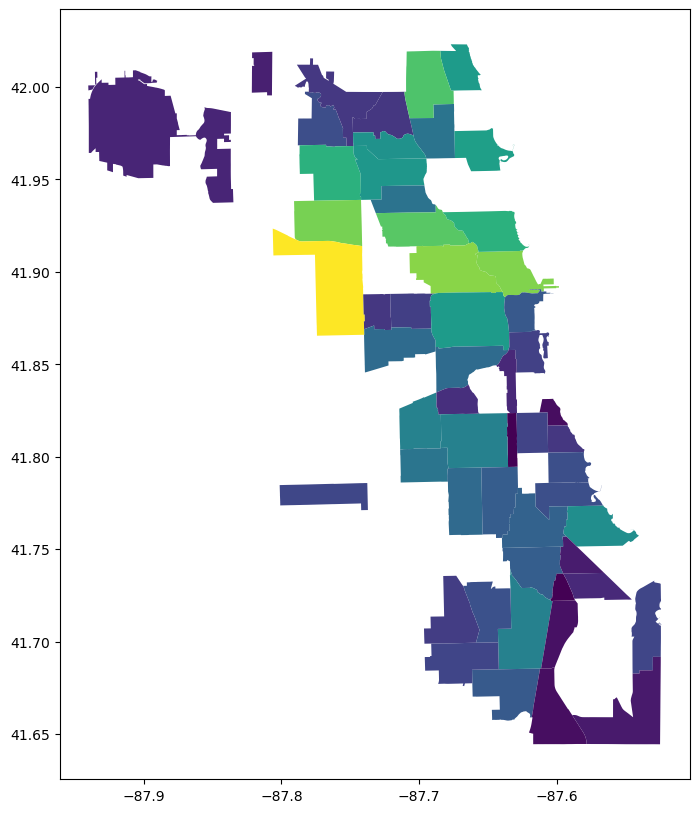

In [37]:
import numpy as np

chicago.loc[np.random.choice(chicago.index, 30), "POP2010"] = np.nan
chicago.plot(column="POP2010", figsize=(10, 10))

However, passing missing_kwds one can specify the style and label of features containing None or NaN.

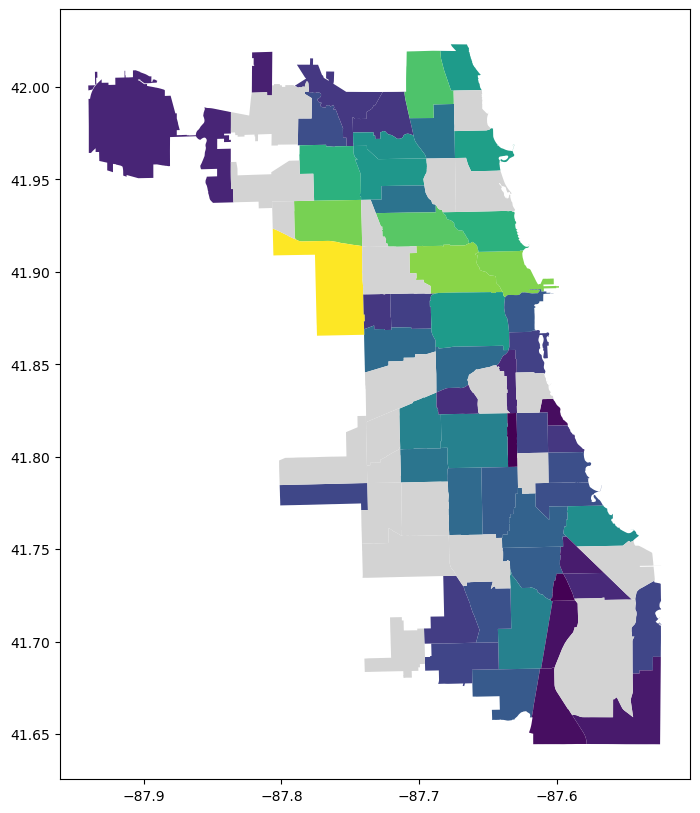

In [38]:
chicago.plot(column='POP2010', missing_kwds={'color': 'lightgrey'}, figsize=(10, 10));

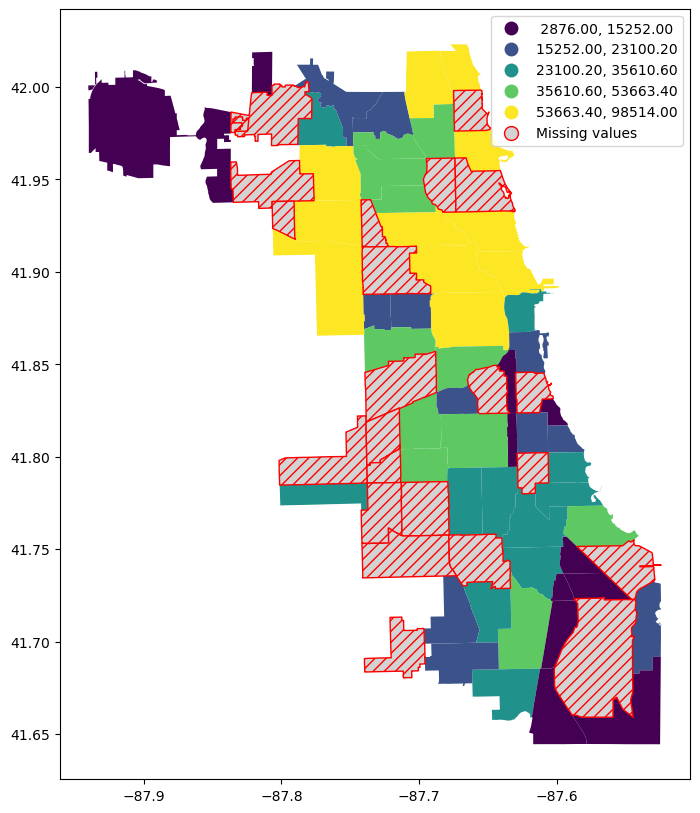

In [39]:
chicago.plot(
    column="POP2010",
    legend=True,
    scheme="quantiles",
    figsize=(15, 10),
    missing_kwds={
        "color": "lightgrey",
        "edgecolor": "red",
        "hatch": "///",
        "label": "Missing values",
    },
);

### Other map customizations
Maps usually do not have to have axis labels. You can turn them off using *`set_axis_off()`* or *`axis("off")`* axis methods.

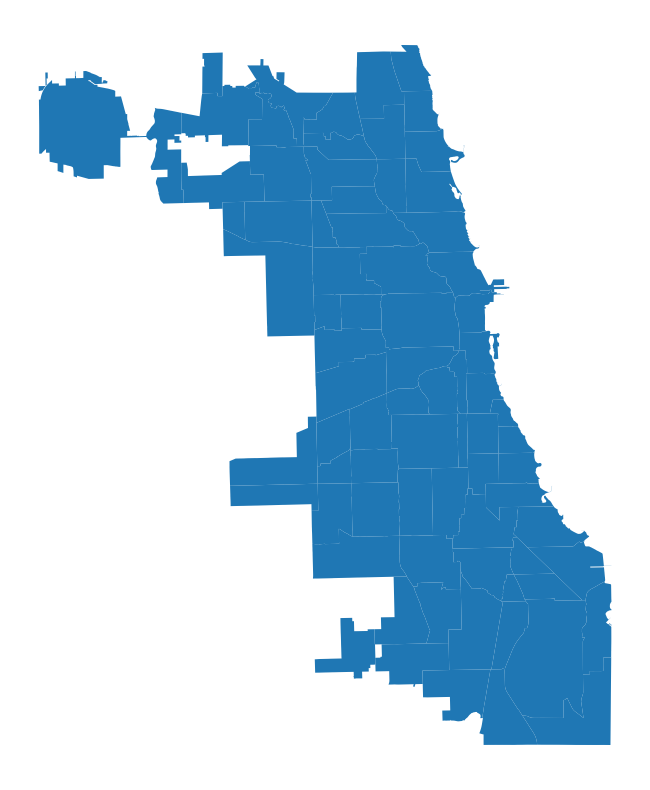

In [41]:
ax = chicago.plot(figsize=(10, 10))
ax.set_axis_off();

### Maps with layers
There are two strategies for making a map with multiple layers – one more succinct, and one that is a little more flexible.

Before combining maps, however, remember to always ensure they share a common CRS (so they will align).

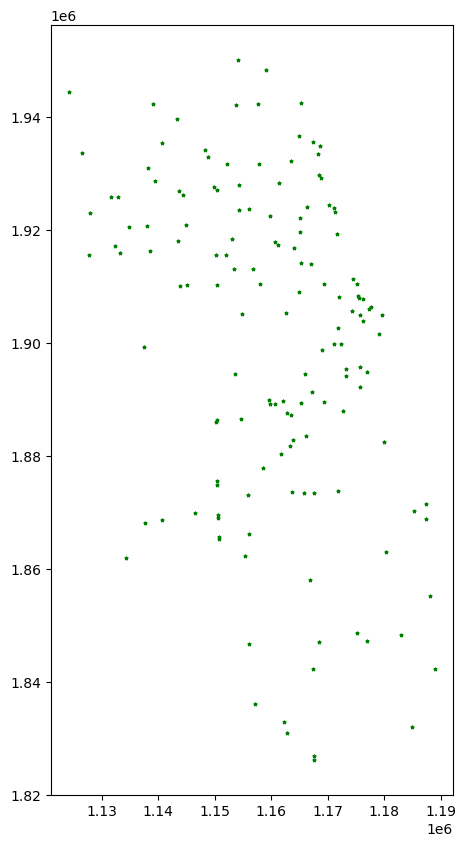

In [42]:
# Look at capitals
# Note use of standard `pyplot` line style options
groceries.plot(marker='*', color='green', markersize=5, figsize=(10, 10));

# Check crs
groceries = groceries.to_crs(chicago.crs)

# Now you can overlay over the outlines

Method 1

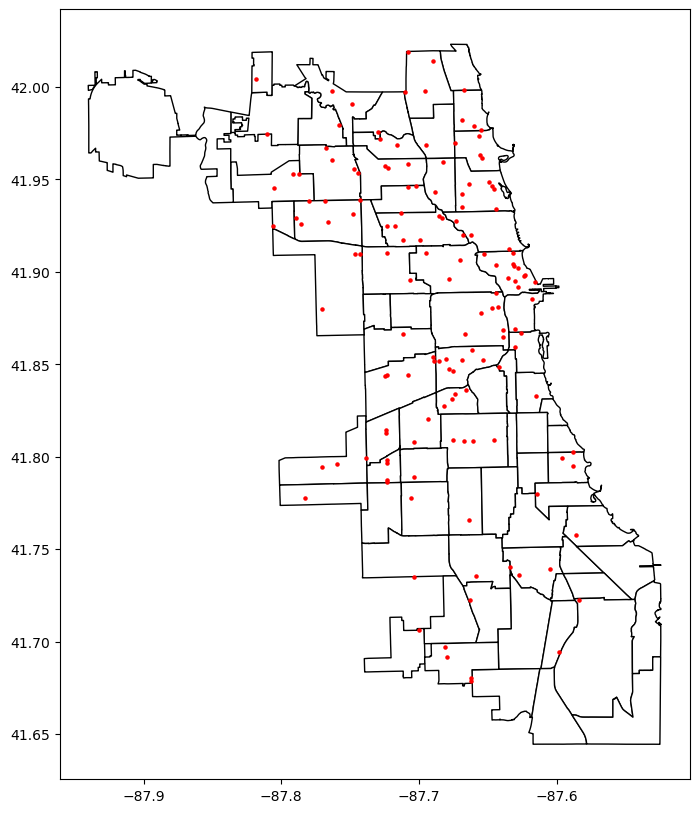

In [43]:
base = chicago.plot(color='white', edgecolor='black', figsize=(10, 10))
groceries.plot(ax=base, marker='o', color='red', markersize=5);

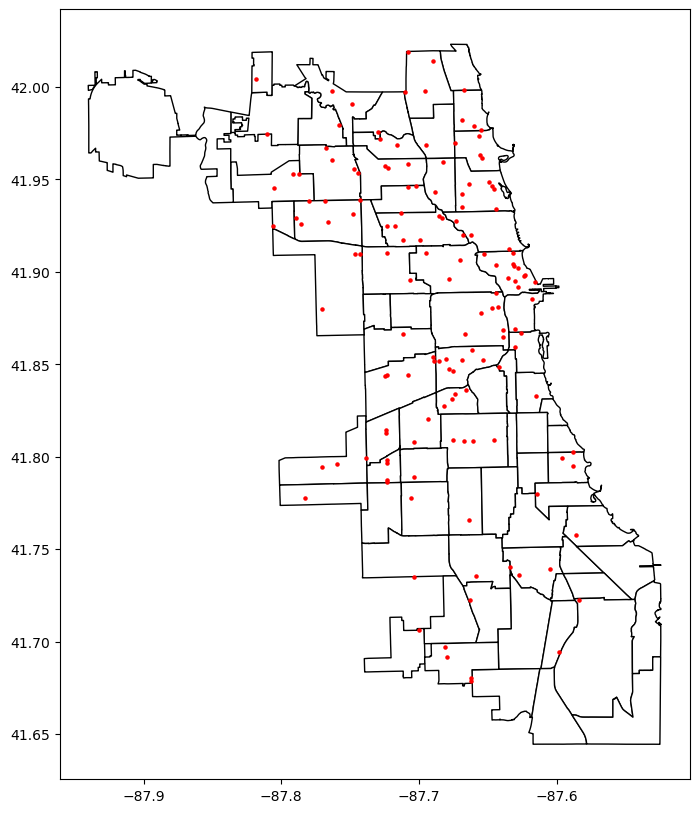

In [44]:
fig, ax = plt.subplots(figsize=(10, 10))

chicago.plot(ax=ax, color='white', edgecolor='black')
groceries.plot(ax=ax, marker='o', color='red', markersize=5)

plt.show();

### Control the order of multiple layers in a plot
When plotting multiple layers, use *`zorder`* to take control of the order of layers being plotted. The lower the *`zorder`* is, the lower the layer is on the map and vice versa.

Without specified *`zorder`*, cities (Points) gets plotted below world (Polygons), following the default order based on geometry types.

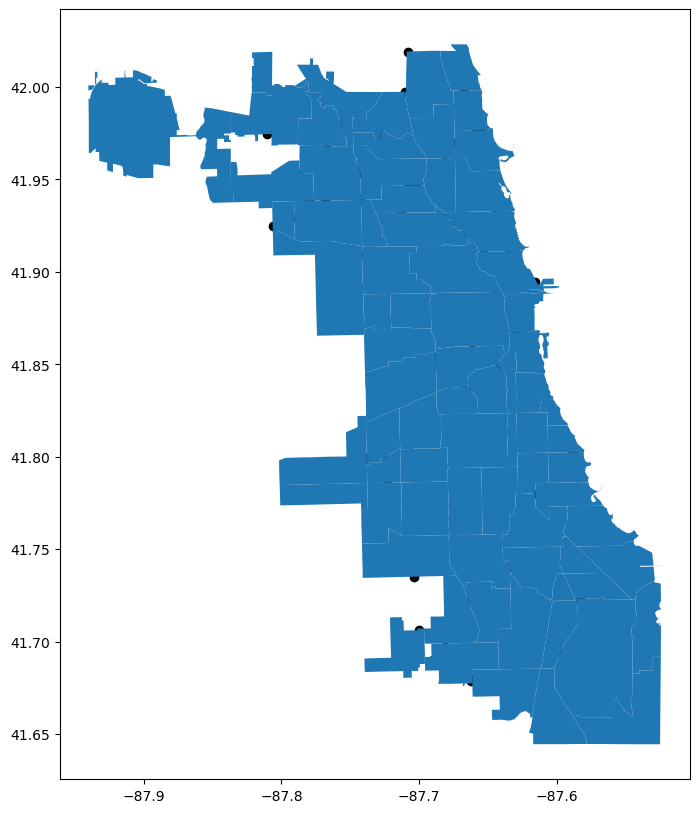

In [46]:
ax = groceries.plot(color='k', figsize=(10, 10))
chicago.plot(ax=ax);

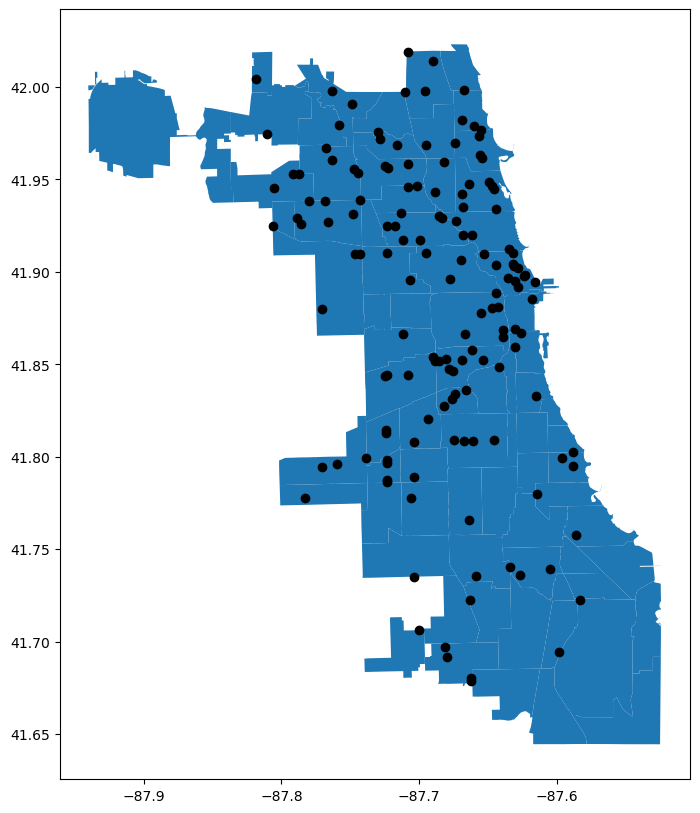

In [47]:
ax = groceries.plot(color='k', zorder=2, figsize=(10, 10))
chicago.plot(ax=ax, zorder=1);

### Pandas plots
Plotting methods also allow for different plot styles from pandas along with the default *`geo`* plot. These methods can be accessed using the *`kind`* keyword argument in [`plot()`](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot), and include:

- *`geo`* for mapping
- *`line`* for line plots
- *`bar`* or *`barh`* for bar plots
- *`hist`* for histogram
- *`box`* for boxplot
- *`kde`* or *`density`* for density plots
- *`area`* for area plots
- *`scatter`* for scatter plots
- *`hexbin`* for hexagonal bin plots
- *`pie`* for pie plots

<Axes: xlabel='POP2010', ylabel='POP2000'>

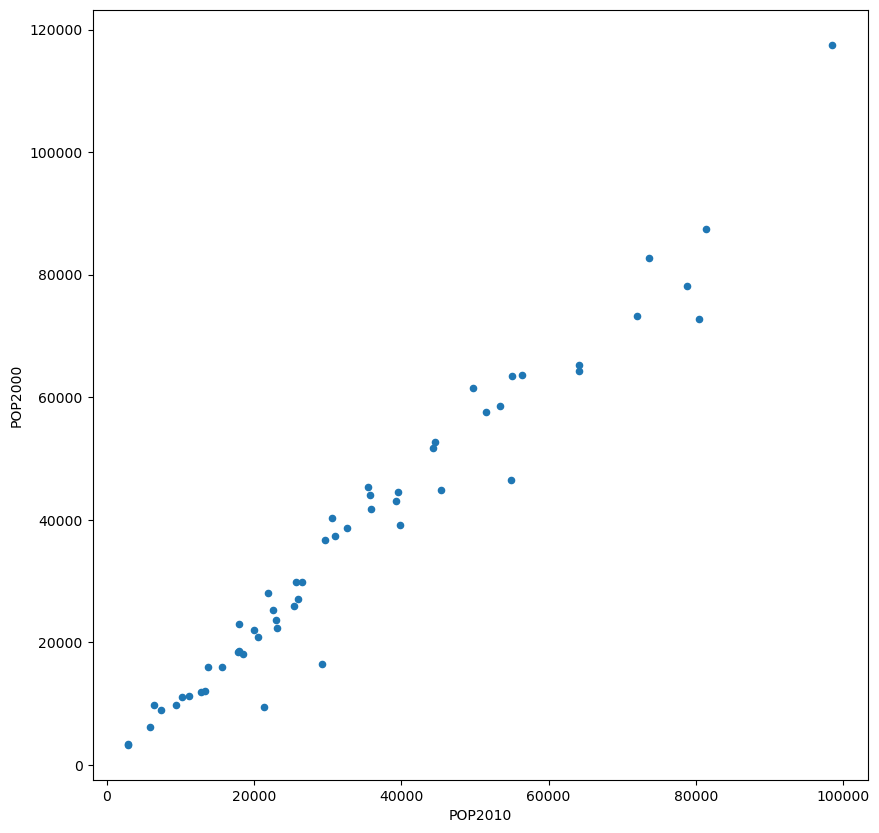

In [48]:
chicago.plot(kind="scatter", x="POP2010", y="POP2000", figsize=(10, 10))

You can also create these other plots using the *`GeoDataFrame.plot.<kind>`* accessor methods instead of providing the *`kind`* keyword argument. For example, *`hist`*, can be used to plot histograms of population for two different years from the Chicago dataset.

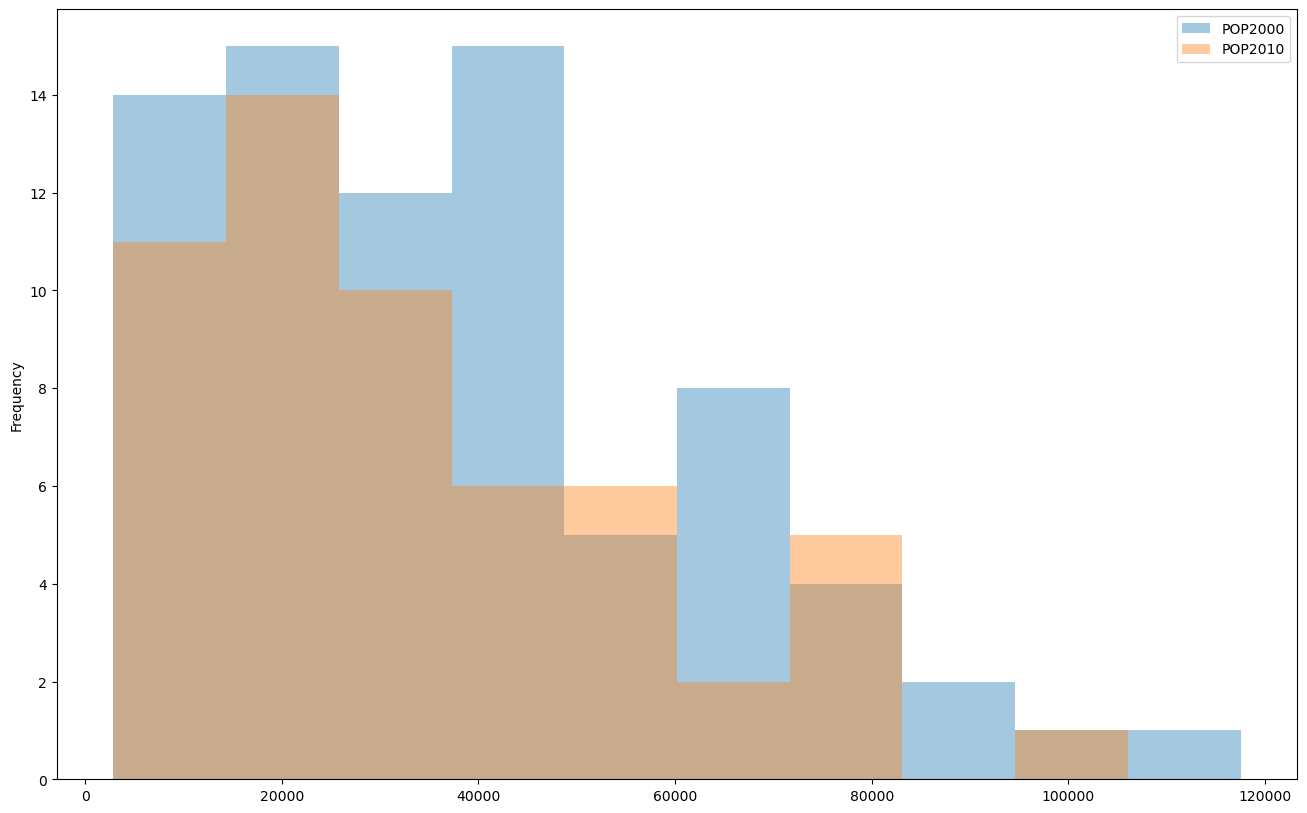

In [55]:
chicago[["POP2000", "POP2010", "geometry"]].plot.hist(alpha=0.4, figsize=(16, 10));

For more information, see [Chart visualization](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html) in the pandas documentation.

### Other resources
Links to Jupyter Notebooks for different mapping tasks:

[Making Heat Maps](http://nbviewer.jupyter.org/gist/perrygeo/c426355e40037c452434)